### The problem: fitting a lot of data on a plot

How do you fit multiple data points so that all the bubbles and labels are visible? The challenge is to avoid overlapping when data points are close to each other and there are outliers. 

An example is fitting data about war death toll.

In [2]:
import pandas as pd
w = pd.read_csv('warsTollWiki.csv', skiprows=2)
w.head()



,War,Death\nrange,Date,Combatants,Location,Notes
0,Conquests of Cyrus the Great,"100,000+",549 BC–530 BC,Persian Empire vs. various states,Middle East,Number given is the sum of all deaths in battl...
1,Greco–Persian Wars,"300,000+",499 BC–449 BC,Greek City-States vs. Persian Empire,Greece,NaN
2,Chinese Warring States,"1,500,000+",c. 475 BC – 221 BC,Seven great powers of China,China,"Estimated at 1,500,000 before Qin's wars of un..."
3,Samnite Wars,"33,500+",343 BC–290 BC,Roman Republic vs. Samnites,Italy,Number given is the sum of all deaths in battl...
4,Wars of Alexander the Great,"142,000+",336 BC–323 BC,Macedonian Empire and other Greek City-States ...,Middle East / North Africa / Central Asia / India,Number given is the sum of all deaths in battl...


In [3]:
w.head(20)

,War,Death\nrange,Date,Combatants,Location,Notes
0,Conquests of Cyrus the Great,"100,000+",549 BC–530 BC,Persian Empire vs. various states,Middle East,Number given is the sum of all deaths in battl...
1,Greco–Persian Wars,"300,000+",499 BC–449 BC,Greek City-States vs. Persian Empire,Greece,NaN
2,Chinese Warring States,"1,500,000+",c. 475 BC – 221 BC,Seven great powers of China,China,"Estimated at 1,500,000 before Qin's wars of un..."
3,Samnite Wars,"33,500+",343 BC–290 BC,Roman Republic vs. Samnites,Italy,Number given is the sum of all deaths in battl...
4,Wars of Alexander the Great,"142,000+",336 BC–323 BC,Macedonian Empire and other Greek City-States ...,Middle East / North Africa / Central Asia / India,Number given is the sum of all deaths in battl...
5,Punic Wars,"1,620,000–1,920,000+",264 BC–146 BC,Roman Republic vs. Carthaginian Empire,Western Europe / North Africa,NaN
6,First Punic War,"400,000+",264 BC–241 BC,Roman Republic vs. Carthaginian Empire,Southern Europe / North Africa,Part of the Punic Wars
7,Qin's Wars of Unification,"700,000+[citation needed]",230 BC–221 BC,"Qin state vs. Han, Zhao, Yan, Wei, Chu, Qi States",China,Part of Warring States period
8,Second Punic War,"770,000+",218 BC–201 BC,Roman Republic vs. Carthaginian Empire,Western Europe / North Africa,[2] – Part of the Punic Wars
9,Third Punic War,"450,000–750,000+",149 BC–146 BC,Roman Republic vs. Carthaginian Empire,Tunisia,Part of the Punic Wars


In [4]:
import re

def extractFirstNumber(stringWithNumbers):
    try:
        # Find the first group of digits, including commas
        match = re.search(r'[\d,]+', stringWithNumbers)
        
        if match:
            # Replace commas and convert to an integer
            return int(match.group().replace(',', ''))
        else:
            return stringWithNumbers
    except ValueError:
        return stringWithNumbers

In [5]:
w['cleanDate'] = w['Date'].map(extractFirstNumber)


In [6]:
#check whether all dates got extracted

# This approach directly filters rows where the conversion to numeric results in NaN, 
# indicating that those rows contain string values in the 'cleanDate' column.

rows_with_strings = w[pd.to_numeric(w['cleanDate'], errors='coerce').isna()]
rows_with_strings

,War,Death\nrange,Date,Combatants,Location,Notes,cleanDate


In [7]:
#create a BC column
w['BC'] = w['Date'].str.contains('BC')

In [8]:
#extract casualties for graph
#maybe set max and min columns and do 2 graphs...

In [9]:
w = w.rename(columns = {'Death\nrange':'casualties'})


In [10]:
w['lowerRange'] = w['casualties'].map(extractFirstNumber)

In [12]:
import re

def extractSecondOrFirstNumber(stringWithNumbers):

    try:
        # Remove commas, then find all groups of digits
        stringWithNumbers =stringWithNumbers.replace(',', '')
        matches = re.findall(r'\d+',stringWithNumbers)
        if matches:
            if len(matches) == 1:
                return int(matches[0])
            elif len(matches) == 2 and '[' in stringWithNumbers and ']' in stringWithNumbers:
                # Check if the second value is in brackets
                return int(matches[0])
            else:
                return int(matches[1])
        else:
            return stringWithNumbers
    except ValueError:
        return stringWithNumbers
    
    
    

In [13]:
w['higherRange'] = w['casualties'].map(extractSecondOrFirstNumber)

In [14]:
df = w[['War','cleanDate', 'BC', 'lowerRange', 'higherRange']]

In [15]:
df.describe()

,cleanDate,lowerRange,higherRange
count,201.000000,2.010000e+02,2.010000e+02
mean,1637.781095,1.960779e+06,2.917866e+06
std,556.089509,7.183776e+06,9.359959e+06
min,58.000000,1.500000e+04,2.500000e+04
25%,1616.000000,1.000000e+05,1.100000e+05
50%,1894.000000,2.500000e+05,3.620000e+05
75%,1971.000000,7.700000e+05,1.200000e+06
max,2023.000000,8.000000e+07,8.000000e+07


In [16]:
#find row with max value
max_lower_range_row = df.loc[df['lowerRange'].idxmax()]

print(max_lower_range_row)

War            World War II
cleanDate              1939
BC                    False
lowerRange         80000000
higherRange        80000000
Name: 123, dtype: object


In [17]:
df[df['higherRange'] > 30000000]

,War,cleanDate,BC,lowerRange,higherRange
18,Three Kingdoms War,184,False,36000000,40000000
25,An Lushan Rebellion,755,False,13000000,36000000
30,Mongol invasions and conquests,1206,False,30000000,40000000
84,Taiping Rebellion,1850,False,20000000,70000000
123,World War II,1939,False,80000000,80000000


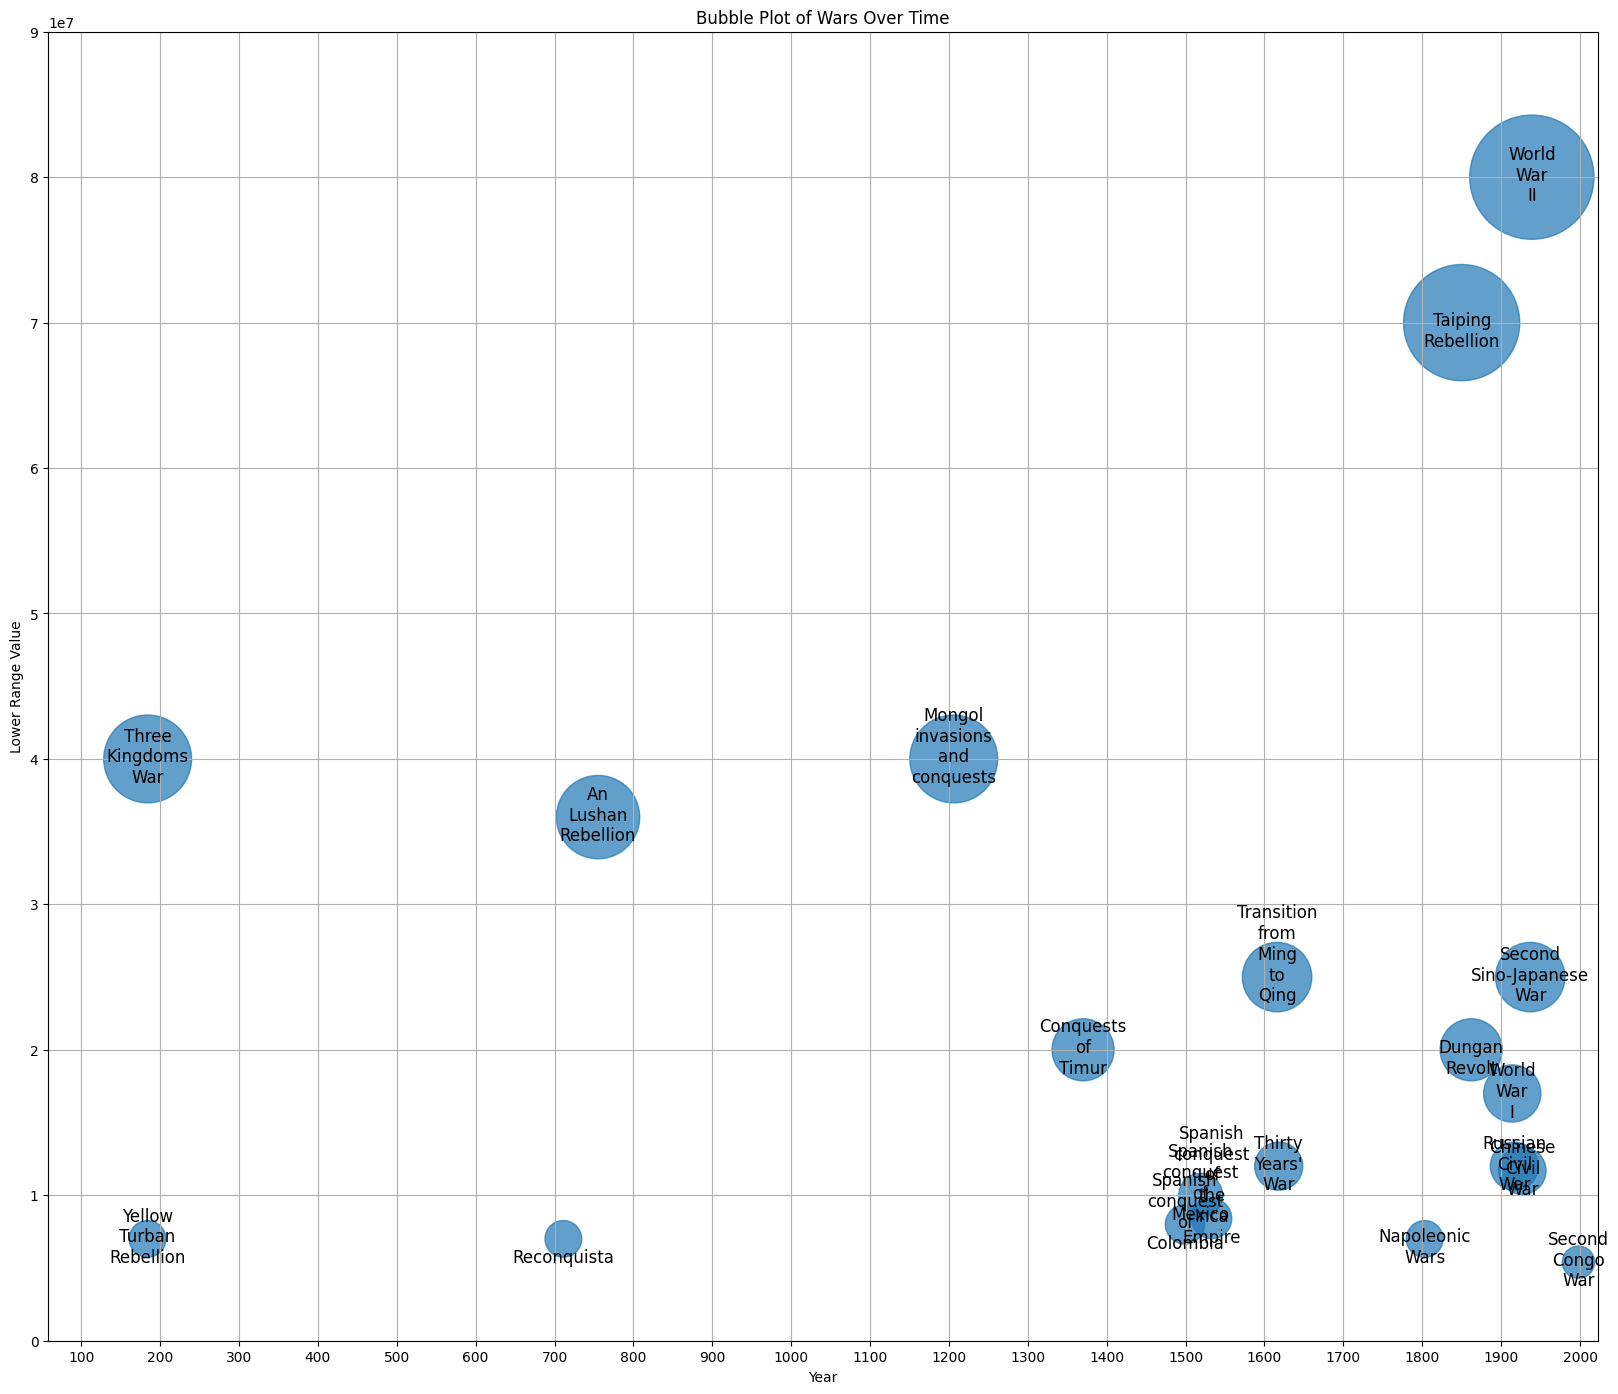

In [18]:
'''
The issue with this bubble graph is the overlapping bubbles and text. I tried using jitter but that didn't help too much.
The text is split into lines to fit better.

'''





import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(20, 17))

# Filter data for BC and AD separately
ad_data = df[(df['BC'] == False) & (df['higherRange'] > 5000000)]




jitter = 0.1  # Adjust the jitter value based on your preference
# plt.scatter(x_values + np.random.normal(0, jitter, size=len(x_values)),
#             y_values + np.random.normal(0, jitter, size=len(y_values)),
#             s=bubble_size, alpha=0.7)

# Plot AD data
scatter = plt.scatter(ad_data['cleanDate']+ np.random.normal(0, jitter, size=len(ad_data['cleanDate'])), ad_data['higherRange']+np.random.normal(0, jitter, size=len(ad_data['higherRange'])), s=ad_data['higherRange'] / 10000, alpha=0.7)


# Set custom limits for better visibility
plt.xlim(min(df['cleanDate']), max(df['cleanDate']))
plt.ylim(0, max(df['higherRange']) + 10000000)  # Adjusted upper limit up to 9M

# Add ticks every 50 years starting from 0 to 2100
plt.xticks(range(100, 2100, 100))

# Add 'war' field as multiline text on each bubble
# for x, y, war in zip(ad_data['cleanDate'], ad_data['higherRange'], ad_data['War']):
#     plt.annotate(war, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, color='black')
    
    
for x, y, war in zip(ad_data['cleanDate'], ad_data['higherRange'], ad_data['War']):
    if len(war)>1:
        lines = war.split()
        text = '\n'.join(lines)
    else:
        text = war
    plt.annotate(text, (x, y), textcoords="offset points", xytext=(0, -17), ha='center', fontsize=12, color='black')

    
    

# Customize the plot
plt.title('Bubble Plot of Wars Over Time')
plt.xlabel('Year')
plt.ylabel('Lower Range Value')
#plt.legend()
plt.grid(True)

# Improve layout
# plt.tight_layout()

plt.show()

### 2 ways of dealing with close bubbles and making the graph clearer

1. Broken axes package
2. Renaming y and y tick positions

## 1. Broken axes package

It will split either axis at specific points, for example where there isn't much data

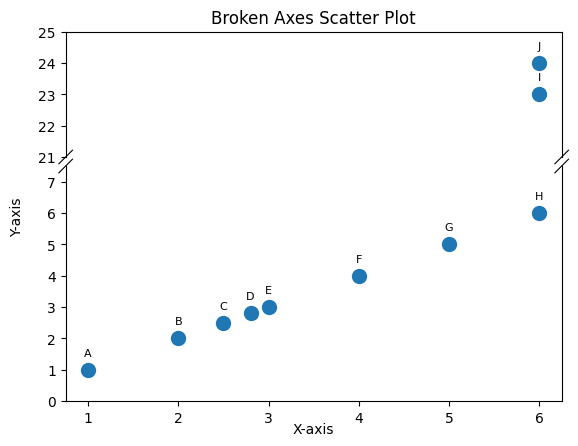

In [23]:
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt

data = {
    'x': [1, 2, 2.5, 2.8, 3, 4, 5, 6, 6, 6],
    'y': [1, 2, 2.5, 2.8, 3, 4, 5, 6, 23, 24],
    'label': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
}

# Create a brokenaxes instance
bax = brokenaxes(ylims=((0, 7.5), (21, 25)), hspace=.05, despine=False)
#bax = brokenaxes( ylims=((0, 3), (4, 6)), hspace=.05, despine=False)


# Scatter plot
bax.scatter(data['x'], data['y'], s=100, label=data['label'])
#plt.scatter(data['x'], data['y'], s=100, label=data['label'])

# Add labels to each point
for x, y, label in zip(data['x'], data['y'], data['label']):
    bax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='black')


# Add labels and title
bax.set_title('Broken Axes Scatter Plot')
bax.set_xlabel('X-axis')
bax.set_ylabel('Y-axis')

# Show the plot
plt.show()

Let's try with more realistic data.

Here is some fake data about death toll in 11 wars. Some bubbles overlap and there are big spaces between some of them.

C:\Users\karol\AppData\Local\Temp\ipykernel_36824\1753941182.py:26: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(war, (x, y), textcoords=offset_transform, ha='center', fontsize=8, color='black')


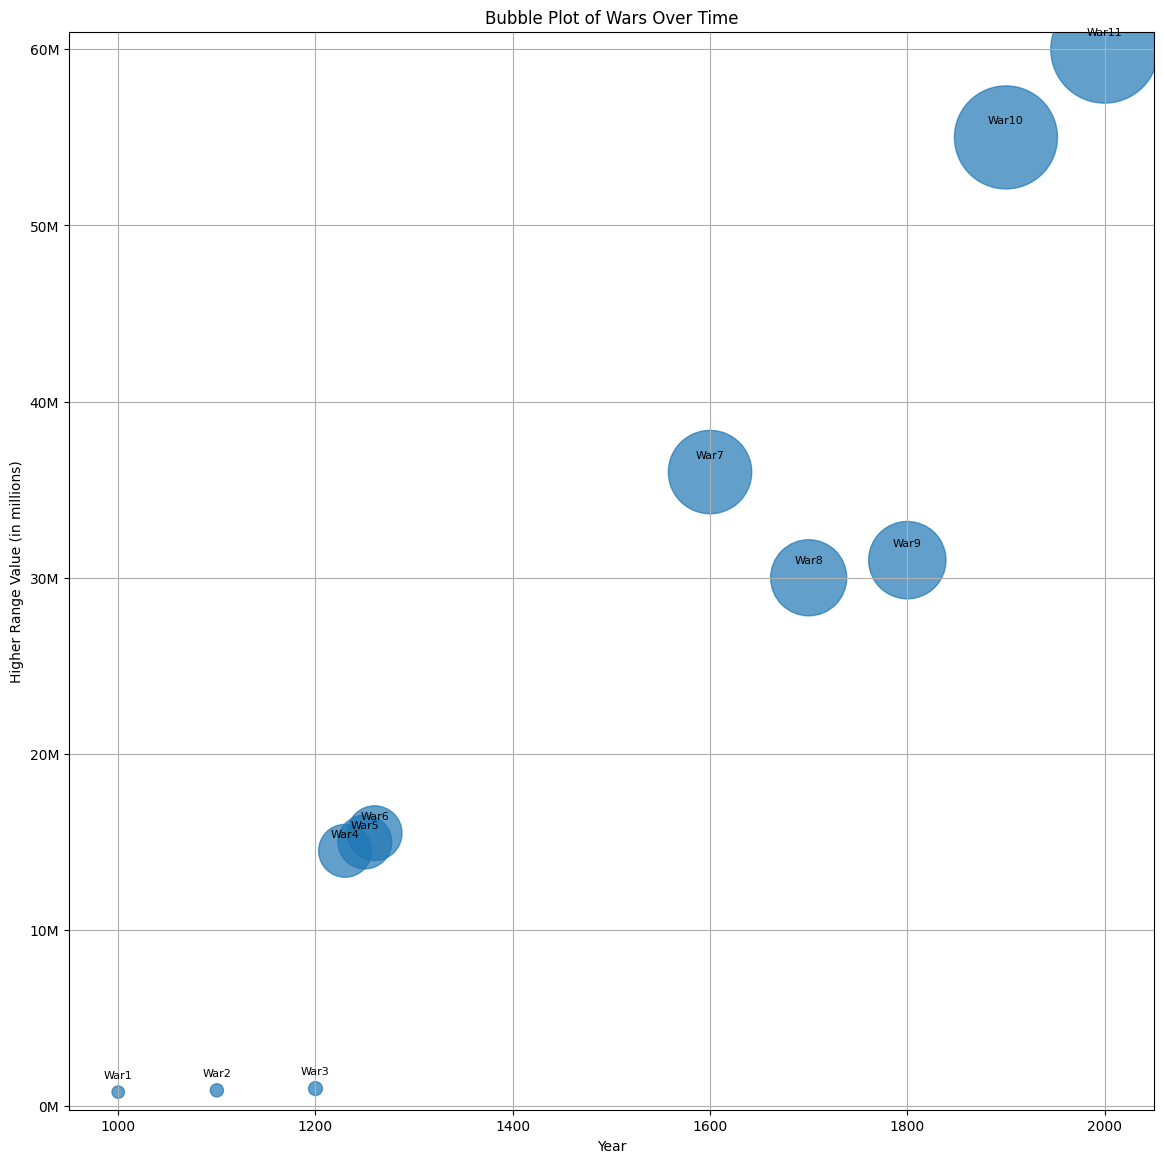

In [24]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
from matplotlib.ticker import FuncFormatter

data = {
    'cleanDate': [1000, 1100, 1200, 1230, 1250, 1260, 1600, 1700, 1800, 1900, 2000],
    'higherRange': [800000, 900000, 1000000, 14500000, 15000000, 15500000, 36000000, 30000000, 31000000, 55000000, 60000000],
    'War': ['War1', 'War2', 'War3', 'War4', 'War5', 'War6', 'War7', 'War8', 'War9', 'War10', 'War11'],
}

fig, ax = plt.subplots(figsize=(14, 14))

# Create a copy of the transform with an offset for annotations
offset_transform = offset_copy(ax.transData, fig=ax.figure, x=0, y=10, units='points')

def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Scatter plot with bubble sizes based on 'higherRange'
ax.scatter(data['cleanDate'], data['higherRange'], s=[size / 10000 for size in data['higherRange']], alpha=0.7)

# Annotate each point with the respective 'War' label using offset_transform
for x, y, war in zip(data['cleanDate'], data['higherRange'], data['War']):
    ax.annotate(war, (x, y), textcoords=offset_transform, ha='center', fontsize=8, color='black')

# Add labels and title
plt.title('Bubble Plot of Wars Over Time')
plt.xlabel('Year')
plt.ylabel('Higher Range Value (in millions)')

# Custom y-axis limits to stretch the y-axis
ax.set_ylim(min(data['higherRange']) - 1000000, max(data['higherRange']) + 1000000)

# Show the plot
plt.grid(True)
plt.show()

Here, I use the broken axes package to spread the data more evenly on the graph.

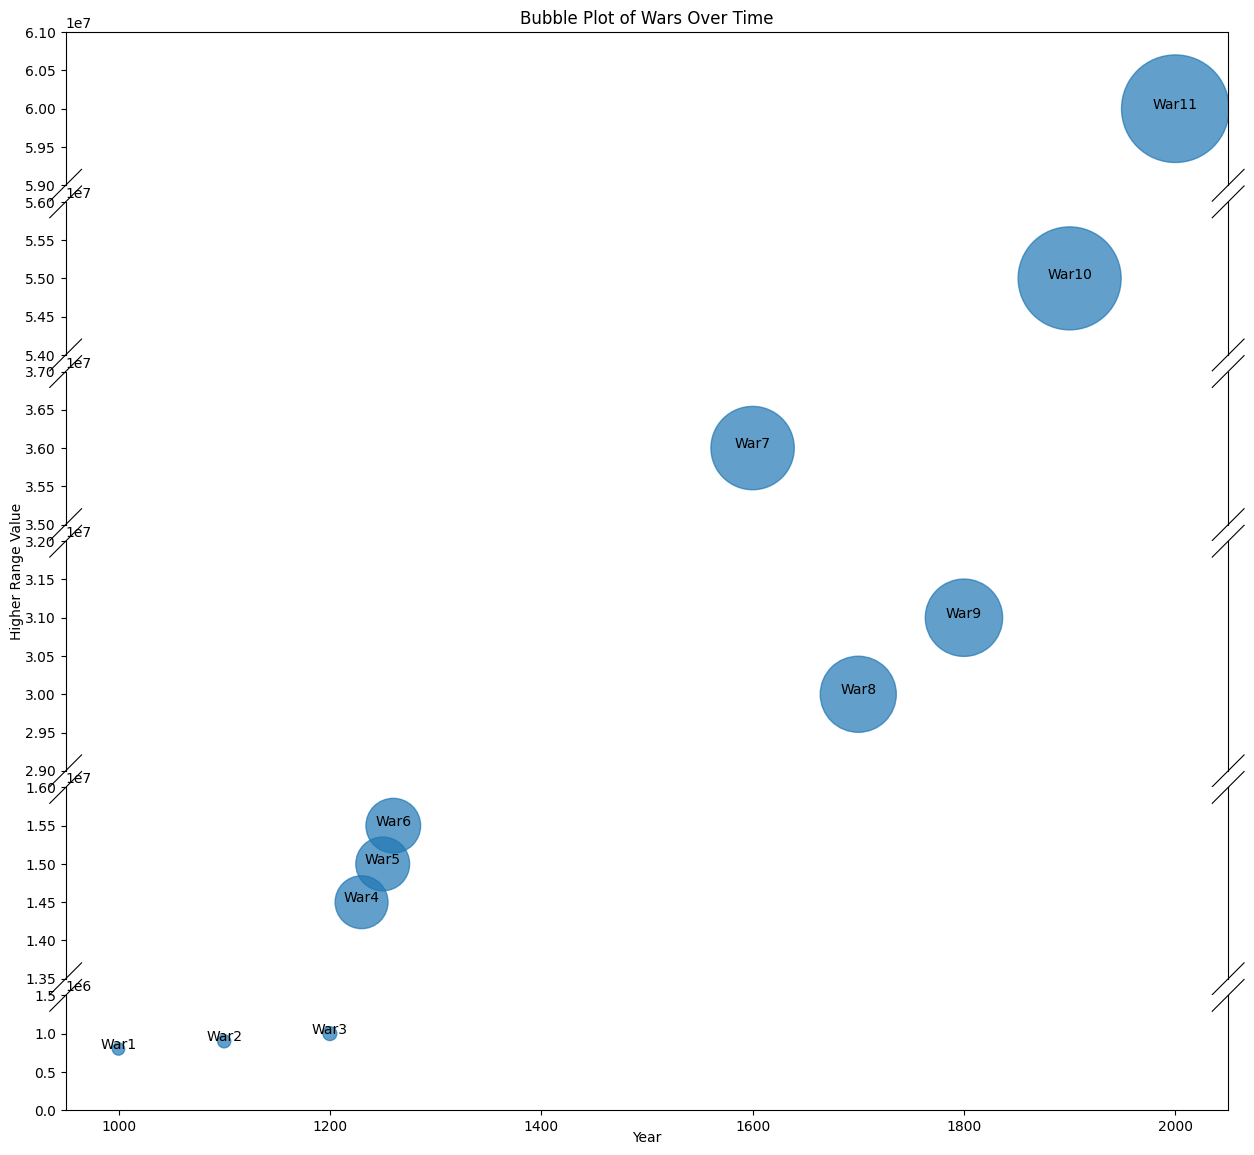

In [25]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

data = {
    'cleanDate': [1000, 1100, 1200, 1230, 1250, 1260, 1600, 1700, 1800, 1900, 2000],
    'higherRange': [800000, 900000, 1000000, 14500000, 15000000, 15500000, 36000000, 30000000, 31000000, 55000000, 60000000],
    'War': ['War1', 'War2', 'War3', 'War4', 'War5', 'War6', 'War7', 'War8', 'War9', 'War10', 'War11'],
}



# Set the figure size
plt.figure(figsize=(15, 14))

# Create a brokenaxes instance within the figure
bax = brokenaxes(
    ylims=((0, 1500000), (13500000, 16000000), (29000000, 32000000), (35000000, 37000000), (54000000, 56000000), (59000000, 61000000)),
    hspace=.1,
    despine=False
)


# Scatter plot with bubble sizes based on 'higherRange'
bax.scatter(data['cleanDate'], data['higherRange'], s=[size / 10000 for size in data['higherRange']], alpha=0.7)

# Annotate each point with the respective 'War' label
for x, y, war in zip(data['cleanDate'], data['higherRange'], data['War']):
    bax.annotate(war, (x, y), ha='center', fontsize=10, color='black')
    
#     # Add custom y-axis ticks at the 'higherRange' values
# bax.set_yticks(data['higherRange'])
# bax.set_yticklabels([f'{val/1e6:.0f}M' for val in data['higherRange']])
#above is causing error, cant set tics
#bax.axs[0].set_yticks(data['higherRange'])
#bax.axs[0].set_yticklabels([f'{y/1e6:.0f}M' for y in data['higherRange']])

# Add labels and title
bax.set_title('Bubble Plot of Wars Over Time')
bax.set_xlabel('Year')
bax.set_ylabel('Higher Range Value')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
#lets get rid of the ugly 1e6

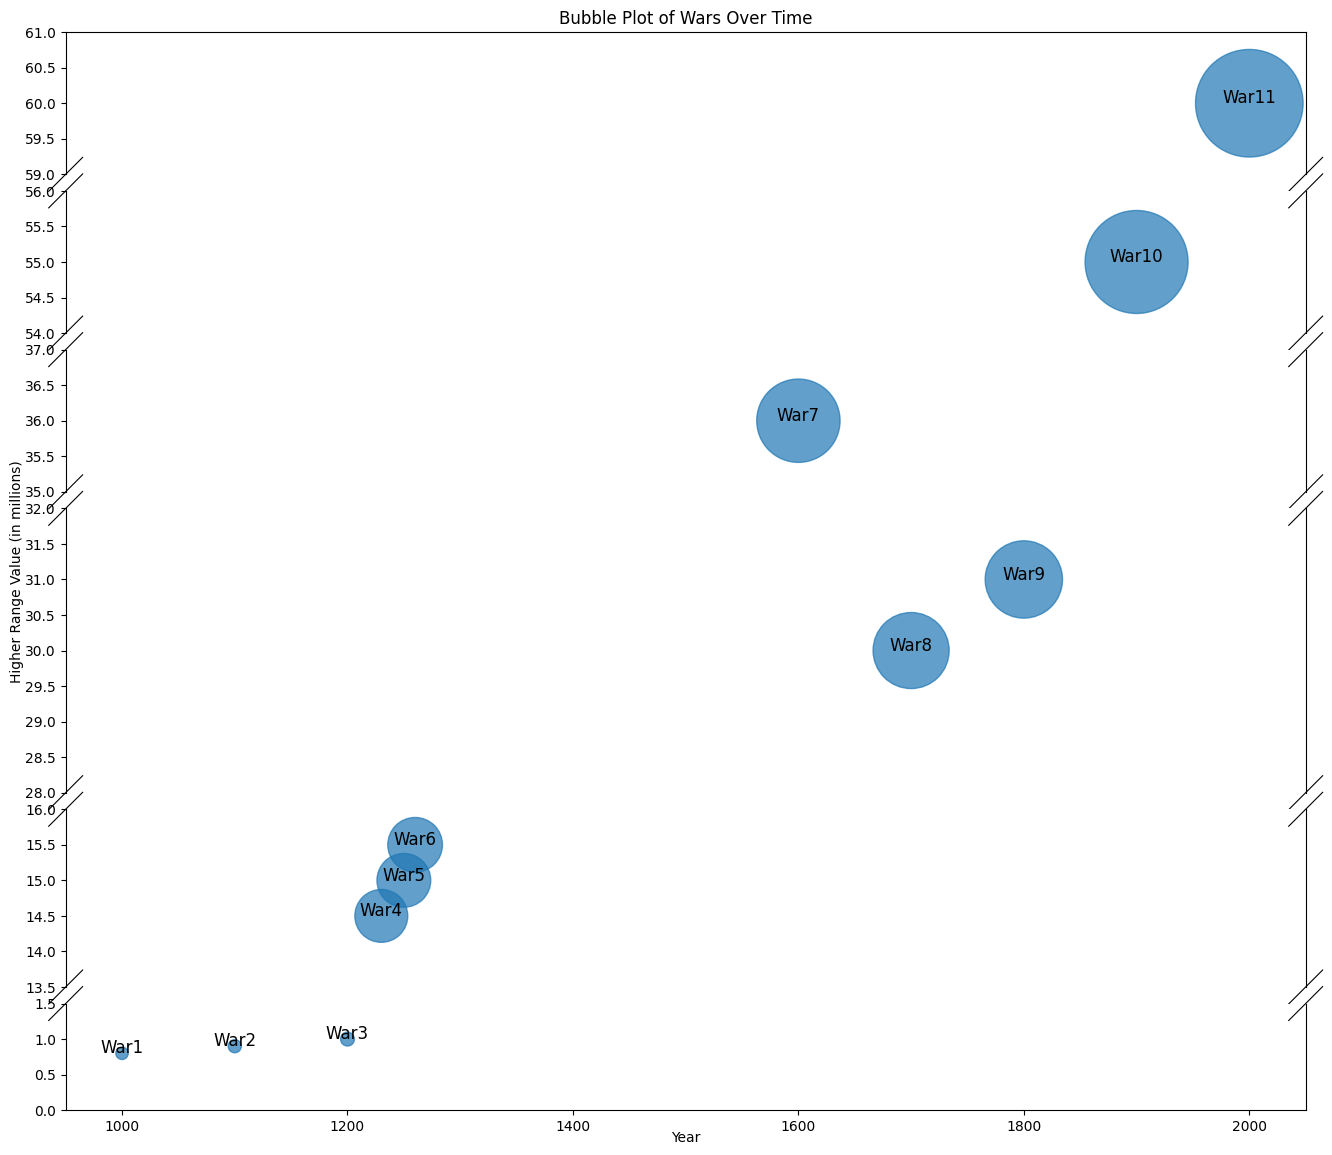

In [26]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

data = {
    'cleanDate': [1000, 1100, 1200, 1230, 1250, 1260, 1600, 1700, 1800, 1900, 2000],
    'higherRange': [800000, 900000, 1000000, 14500000, 15000000, 15500000, 36000000, 30000000, 31000000, 55000000, 60000000],
    'War': ['War1', 'War2', 'War3', 'War4', 'War5', 'War6', 'War7', 'War8', 'War9', 'War10', 'War11'],
}

# Convert y-values to millions for tick labels
y_millions = [y / 1e6 for y in data['higherRange']]

# Set the figure size
plt.figure(figsize=(16, 14))

# Create a brokenaxes instance within the figure
bax = brokenaxes(
    ylims=((0, 1.5), (13.5, 16), (28, 32), (35, 37), (54, 56), (59, 61)),
    hspace=.1,
    despine=False
)

# Scatter plot with bubble sizes based on modified 'higherRange'
bax.scatter(data['cleanDate'], y_millions, s=[size / 10000 for size in data['higherRange']], alpha=0.7)

# Annotate each point with the respective 'War' label
for x, y, war in zip(data['cleanDate'], y_millions, data['War']):
    bax.annotate(war, (x, y), ha='center', fontsize=12, color='black')

# # Set y-axis ticks for specific axes
# bax.axs[0].set_yticks([0, 0.5, 1])
# bax.axs[0].set_yticklabels(['0M', '0.5M', '1M'])

# Add labels and title
bax.set_title('Bubble Plot of Wars Over Time')
bax.set_xlabel('Year')
bax.set_ylabel('Higher Range Value (in millions)')

# Show the plot
plt.grid(True)
plt.show()

Now let's try with real data.

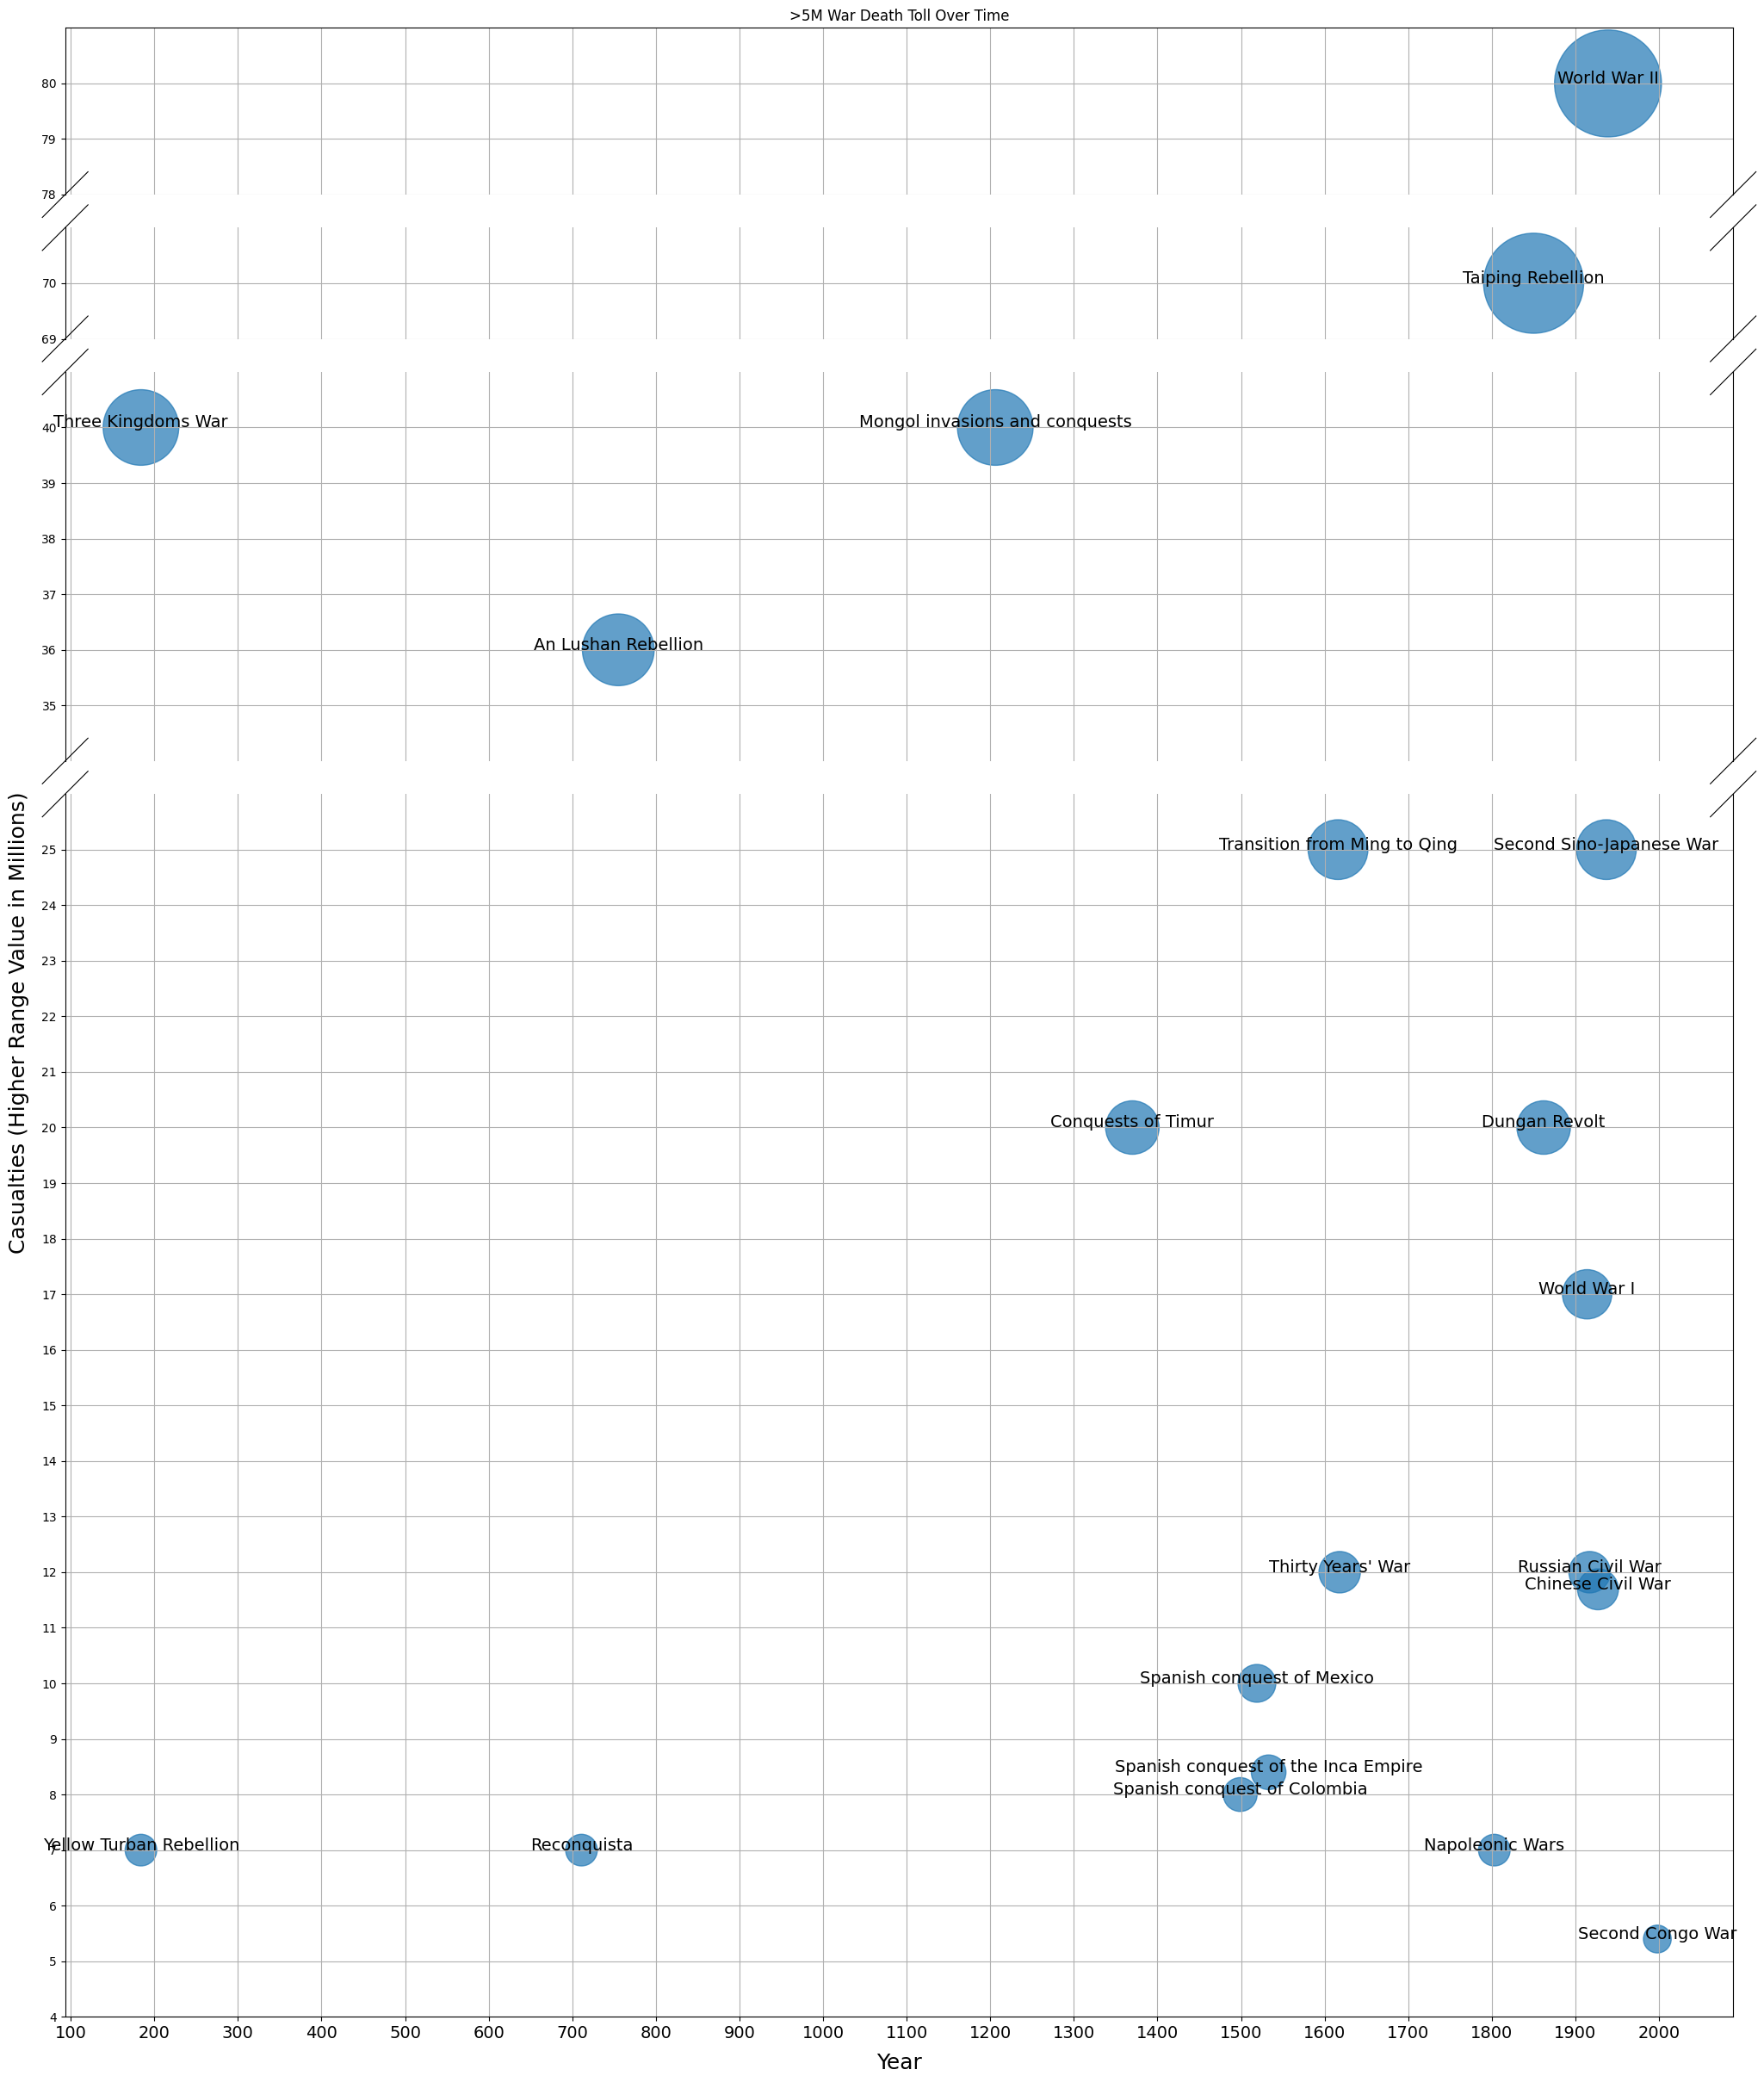

In [77]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25, 30))

# Filter data for BC and AD separately
ad_data = df[(df['BC'] == False) & (df['higherRange'] > 5000000)]

# Convert y-values to millions for tick labels
y_millions = [y / 1e6 for y in ad_data['higherRange']]

# Create a brokenaxes instance within the figure
bax = brokenaxes(
    ylims=((4, 26),(34,41), (69, 71),(78, 81)),
    hspace=.07,
    despine=False
)

# Scatter plot with bubble sizes based on modified 'higherRange'
bax.scatter(ad_data['cleanDate'], y_millions, s=[size / 10000 for size in ad_data['higherRange']], alpha=0.7)

#Annotate each point with the respective 'War' label
for x, y, war in zip(ad_data['cleanDate'], y_millions, ad_data['War']):
    bax.annotate(war, (x, y), ha='center', fontsize=14, color='black')

#  # Format Ticks
#https://stackoverflow.com/questions/77415705/how-do-i-get-plotly-to-display-a-graph-object-scatter-plot-type-line-with-ra
for ax in bax.axs:
    ax.grid(which='major', axis='both')
    ax.xaxis.set_tick_params(labelsize=14)
    ax.xaxis.set_ticks(np.arange(100, 2001, 100))

#y ticks need to be set manually    
bax.axs[3].yaxis.set_ticks(np.arange(4, 26, 1))
bax.axs[2].yaxis.set_ticks(np.arange(35, 41, 1)) 
bax.axs[1].yaxis.set_ticks(np.arange(69, 71, 1)) 
bax.axs[0].yaxis.set_ticks(np.arange(78, 81, 1)) 

# Customize the plot
# Add labels and title
bax.set_title('>5M War Death Toll Over Time')
bax.set_xlabel('Year',  labelpad = 30, fontsize=18)
bax.set_ylabel('Casualties (Higher Range Value in Millions)',  labelpad = 30, fontsize=18)

fig.tight_layout()#not sure this is working....

plt.show()

In [ ]:
#check WW1 range17,000,000-40,000,000	 current data only show 17K
#the
df[df['War'] == 'Moorish Wars']
#old wikipedia graph is from 2019
#it's end of feb and the data has changed in the table, WWI has a different range than before

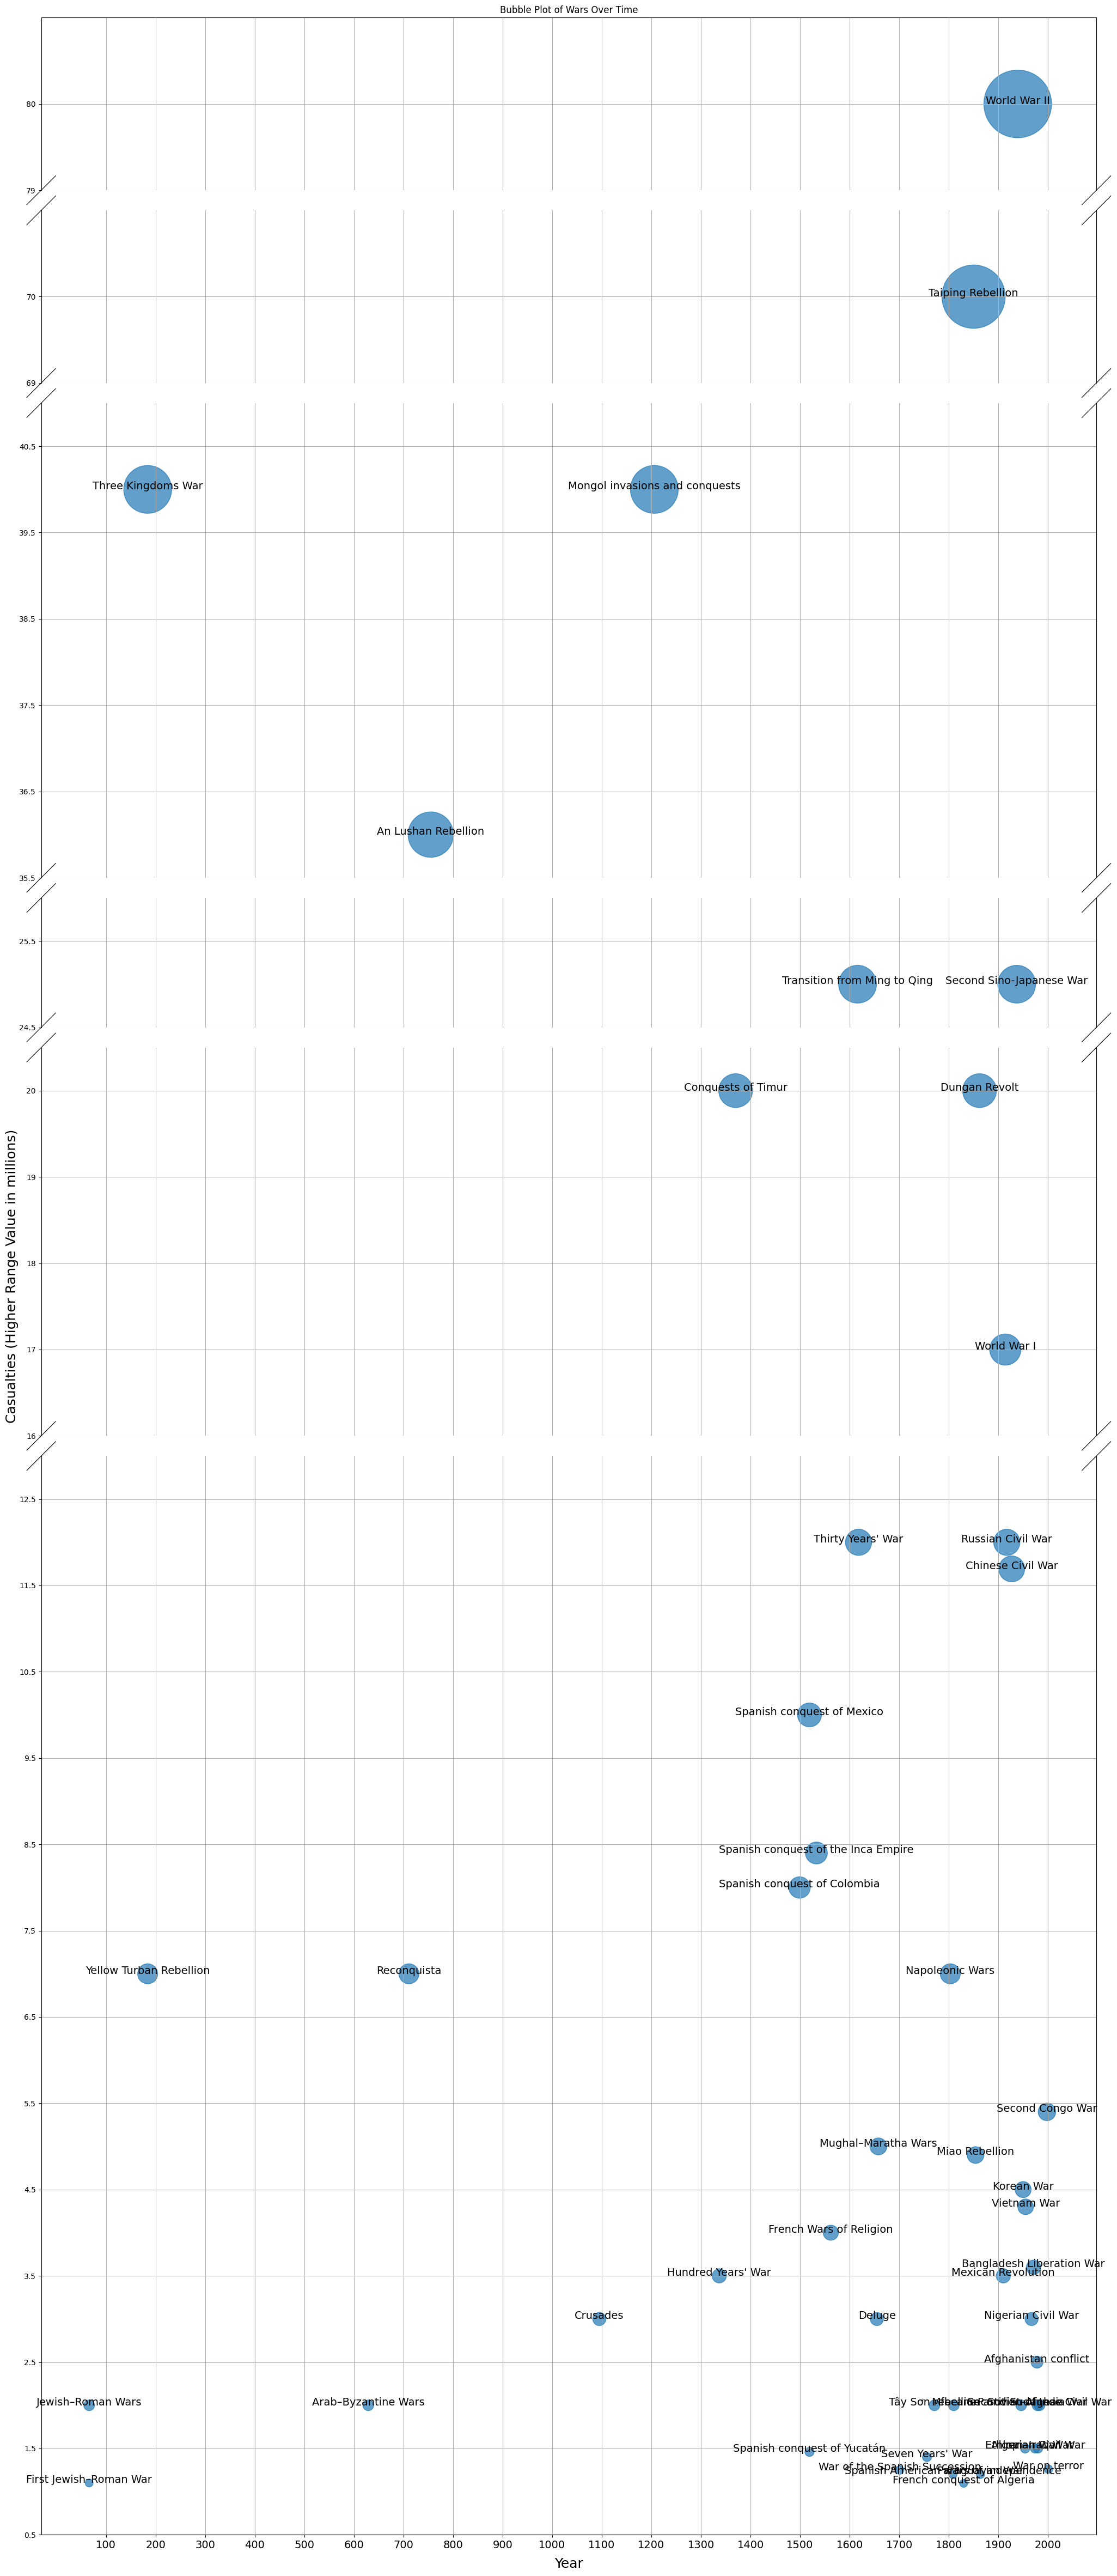

In [76]:

import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(25, 60))

# Filter data for BC and AD separately
ad_data = df[(df['BC'] == False) & (df['higherRange'] > 1000000)]

# Convert y-values to millions for tick labels
y_millions = [y / 1e6 for y in ad_data['higherRange']]

# Create a brokenaxes instance within the figure
bax = brokenaxes(
    ylims=((0.5, 13),(16,20.5),(24.5, 26),(35.5,41), (69, 71),(79, 81)),
    hspace=.05,
    despine=False
)

# Scatter plot with bubble sizes based on modified 'higherRange'
bax.scatter(ad_data['cleanDate'], y_millions, s=[size / 10000 for size in ad_data['higherRange']], alpha=0.7)



# Plot AD data
#scatter = plt.scatter(ad_data['cleanDate']+ np.random.normal(0, jitter, size=len(ad_data['cleanDate'])), ad_data['higherRange']+np.random.normal(0, jitter, size=len(ad_data['higherRange'])), s=ad_data['higherRange'] / 10000, alpha=0.7)


# # Set custom limits for better visibility
# plt.xlim(min(df['cleanDate']), max(df['cleanDate']))
# plt.ylim(0, max(df['higherRange']) + 10000000)  # Adjusted upper limit up to 9M

# Add ticks every 50 years starting from 0 to 2100
#plt.xticks(range(100, 2100, 100))

# Add 'war' field as multiline text on each bubble
# for x, y, war in zip(ad_data['cleanDate'], ad_data['higherRange'], ad_data['War']):
#     plt.annotate(war, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, color='black')
#better don't split them    
    
# for x, y, war in zip(ad_data['cleanDate'], y_millions, ad_data['War']):
#     if len(war)>1:
#         lines = war.split()
#         text = '\n'.join(lines)
#     else:
#         text = war
#     bax.annotate(text, (x, y), textcoords="offset points", xytext=(0, -17), ha='center', fontsize=12, color='black')
    #bax.annotate(text, (x, y), ha='center', fontsize=12, color='black')
    
#Annotate each point with the respective 'War' label
for x, y, war in zip(ad_data['cleanDate'], y_millions, ad_data['War']):
    bax.annotate(war, (x, y), ha='center', fontsize=14, color='black')


#this grid doesn't show and overrides tics if put at the end
#bax.grid(axis='both', which='major', ls='-')

#  # Format Ticks
#https://stackoverflow.com/questions/77415705/how-do-i-get-plotly-to-display-a-graph-object-scatter-plot-type-line-with-ra
for ax in bax.axs:
    ax.grid(which='major', axis='both')
    ax.xaxis.set_tick_params(labelsize=14)
    #ax.xaxis.set_major_formatter(x_major_formatter)
    #ax.xaxis.set_ticks(ad_data['cleanDate'])
    ax.xaxis.set_ticks(np.arange(100, 2001, 100))
    #ax.yaxis.set_ticks(np.arange(5, 80, 5)) this doesn't work,
    
    #would need to do each part separately
#y ticks need to be set manually    
bax.axs[5].yaxis.set_ticks(np.arange(0.5, 13, 1))

bax.axs[4].yaxis.set_ticks(np.arange(16, 20.5, 1))
bax.axs[3].yaxis.set_ticks(np.arange(24.5, 26, 1))

bax.axs[2].yaxis.set_ticks(np.arange(35.5, 41, 1)) 
bax.axs[1].yaxis.set_ticks(np.arange(69, 71, 1)) 
bax.axs[0].yaxis.set_ticks(np.arange(79, 81, 1)) 



    



#bax[1].set_xticks(np.array([0,2,4,6,8,10]))

#bax.set_xticks(np.array([0,2,4,6,8,10]))

#bax.axs[3] is a list from 0-3 index accessing parts of the axis
#bax.axs[3].set_xticks(np.array([0,2,4,6,8,10]))


# Customize the plot
# Add labels and title
bax.set_title('Bubble Plot of Wars Over Time')
bax.set_xlabel('Year',  labelpad = 30, fontsize=18)
bax.set_ylabel('Casualties (Higher Range Value in millions)',  labelpad = 30, fontsize=18)

fig.tight_layout()#not sure this is working....

plt.show()

In [ ]:
#the above is the best i can do with brokenaxes
#not ideal, and doesn't handle well situations when you have many close bubbles, only the graph with casualties from 5M looks fine
#broken axes is more for stretching, doesn't handle close datpoints very wells

## 2. Resetting y positions

This method resets the positions of y to whatever you like. It requires some pre-processing to figure out the right distances between positions.

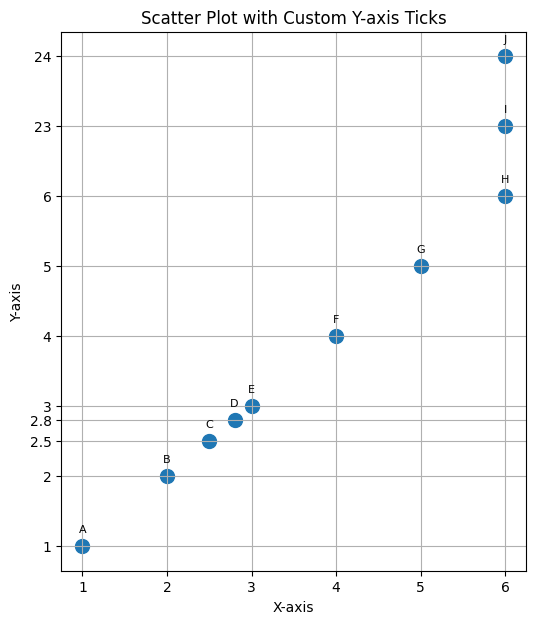

In [29]:
import matplotlib.pyplot as plt

data = {
    'x': [1, 2, 2.5, 2.8, 3, 4, 5, 6, 6, 6],
    'y': [1, 2, 2.5, 2.8, 3, 4, 5, 6, 7, 8],
    'label': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
}

# Set the figure size
plt.figure(figsize=(6, 7))

# Scatter plot with labels
plt.scatter(data['x'], data['y'], s=100, label=data['label'])

# Add labels to each point
for x, y, label in zip(data['x'], data['y'], data['label']):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='black')

# Custom y-tick positions and labels with doubled spacing for 14.0M, 14.5M, 15.0M, 15.5M
ytick_positions = [1, 2, 2.5, 2.8, 3, 4, 5, 6, 7, 8]
ytick_labels = [1, 2, 2.5, 2.8, 3, 4, 5, 6, 23, 24]

plt.yticks(ytick_positions, ytick_labels)

# Add labels and title
plt.title('Scatter Plot with Custom Y-axis Ticks')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.grid(True)
plt.show()

We want the distances between y axis values to be at least roughly accurate, so I calculate the differences between distances of existing data and assign them new numbers that reflect these differences. Above, I manually assigned equal distances, but with a lot of data and big gaps we may want to preseve the magnitude of distances.

In [32]:
#calculate distances between values in an array
import numpy as np
distances = np.diff(data['higherRange'])
sorted_y = np.sort(data['higherRange'])

In [33]:
sorted_y

array([  800000,   900000,  1000000, 14500000, 15000000, 15500000,
       30000000, 31000000, 36000000, 55000000, 60000000])

In [34]:
np.diff(sorted_y)

array([  100000,   100000, 13500000,   500000,   500000, 14500000,
        1000000,  5000000, 19000000,  5000000])

In [35]:
#rank them
from scipy.stats import rankdata

ranks = rankdata(np.diff(sorted_y))
ranks

array([ 1.5,  1.5,  8. ,  3.5,  3.5,  9. ,  5. ,  6.5, 10. ,  6.5])

In [36]:
#divide by the samllest, tis will be 1 unit
#we need to find a way to preserve distances


In [37]:
r = ranks/1.5#maybe divide by 2
ranks_adjusted = r / 2
ranks_adjusted = np.insert(ranks_adjusted, 0, 0.5)


In [38]:
#construct a df with sorted higherstRange and ranks and merge with main df
import pandas as pd
rankDf = pd.DataFrame({'higherRange': sorted_y, 'rank': ranks_adjusted})
rankDf

,higherRange,rank
0,800000,0.500000
1,900000,0.500000
2,1000000,0.500000
3,14500000,2.666667
4,15000000,1.166667
5,15500000,1.166667
6,30000000,3.000000
7,31000000,1.666667
8,36000000,2.166667
9,55000000,3.333333


In [39]:
# Create a new column for the desired sum
rankDf['sum_higher_rank'] = rankDf['higherRange'].copy()
for i in range(1, len(rankDf)):
    rankDf.loc[i, 'sum_higher_rank'] = rankDf.loc[i - 1, 'sum_higher_rank'] + (rankDf.loc[i, 'rank'])*100000

rankDf

,higherRange,rank,sum_higher_rank
0,800000,0.500000,8.000000e+05
1,900000,0.500000,8.500000e+05
2,1000000,0.500000,9.000000e+05
3,14500000,2.666667,1.166667e+06
4,15000000,1.166667,1.283333e+06
5,15500000,1.166667,1.400000e+06
6,30000000,3.000000,1.700000e+06
7,31000000,1.666667,1.866667e+06
8,36000000,2.166667,2.083333e+06
9,55000000,3.333333,2.416667e+06


In [40]:

df_data = pd.DataFrame(data)
merged_df = pd.merge(df_data, rankDf, on='higherRange', how='inner')
merged_df

,cleanDate,higherRange,War,rank,sum_higher_rank
0,1000,800000,War1,0.500000,8.000000e+05
1,1100,900000,War2,0.500000,8.500000e+05
2,1200,1000000,War3,0.500000,9.000000e+05
3,1230,14500000,War4,2.666667,1.166667e+06
4,1250,15000000,War5,1.166667,1.283333e+06
5,1260,15500000,War6,1.166667,1.400000e+06
6,1600,36000000,War7,2.166667,2.083333e+06
7,1700,30000000,War8,3.000000,1.700000e+06
8,1800,31000000,War9,1.666667,1.866667e+06
9,1900,55000000,War10,3.333333,2.416667e+06


C:\Users\karol\AppData\Local\Temp\ipykernel_36824\3552886961.py:21: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(war, (x, y), textcoords=offset_transform, ha='center', fontsize=8, color='black')


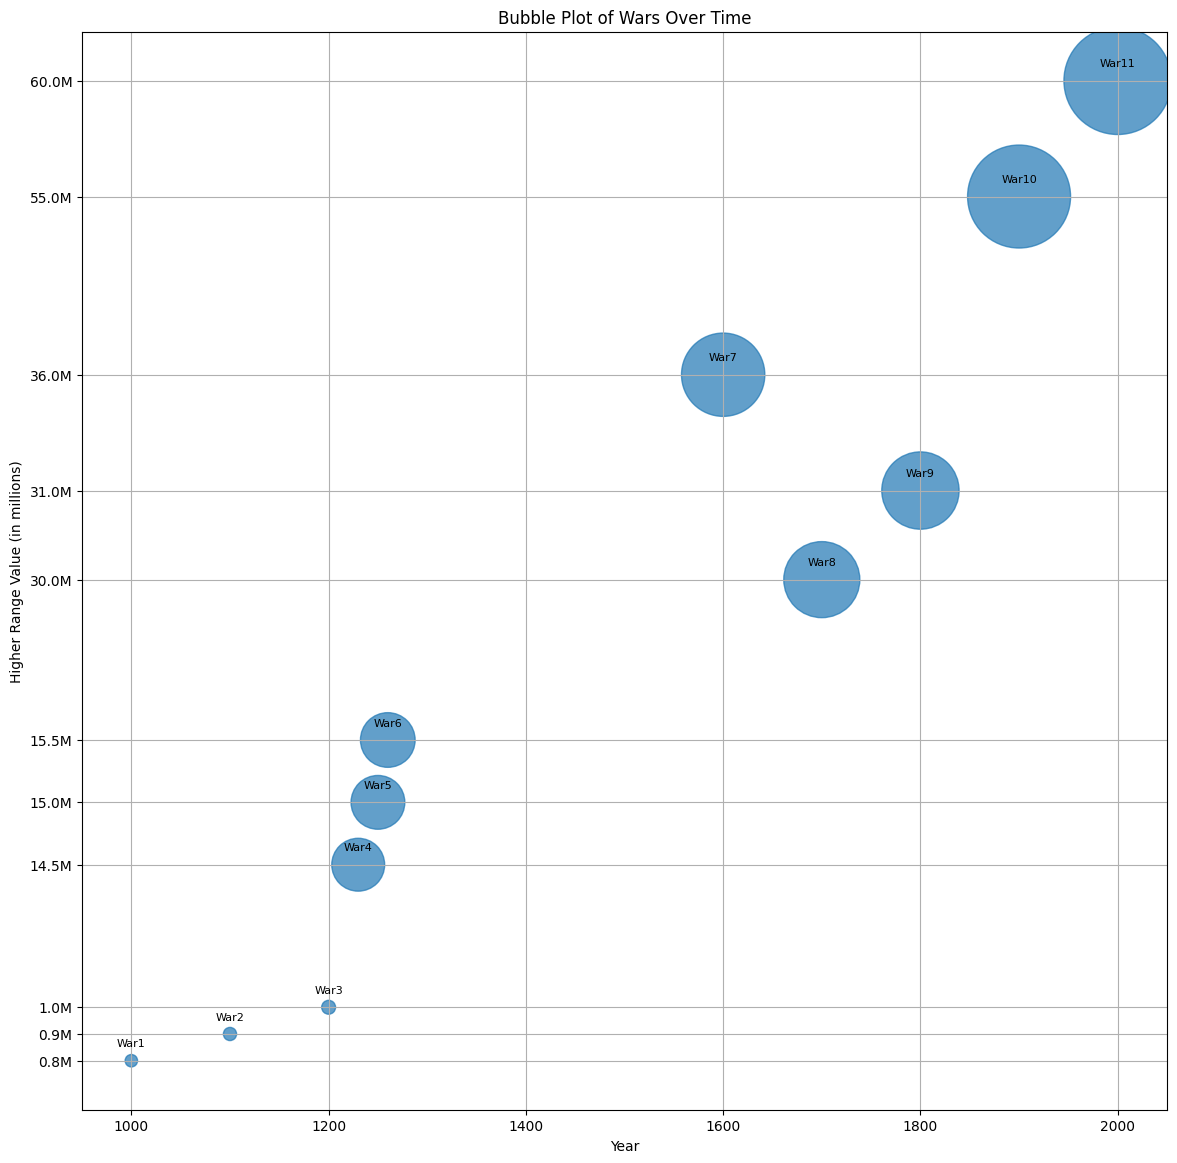

In [41]:
import matplotlib.pyplot as plt


# Set the figure size
#plt.figure(figsize=(6, 7))
fig, ax = plt.subplots(figsize=(14, 14))


# Create a copy of the transform with an offset for annotations
offset_transform = offset_copy(ax.transData, fig=ax.figure, x=0, y=10, units='points')



#ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Scatter plot with bubble sizes based on 'higherRange'
ax.scatter(merged_df['cleanDate'], merged_df['sum_higher_rank'], s=[size / 10000 for size in data['higherRange']], alpha=0.7)

# Annotate each point with the respective 'War' label using offset_transform
for x, y, war in zip(merged_df['cleanDate'], merged_df['sum_higher_rank'], merged_df['War']):
    ax.annotate(war, (x, y), textcoords=offset_transform, ha='center', fontsize=8, color='black')



# Custom y-tick positions and labels with doubled spacing for 14.0M, 14.5M, 15.0M, 15.5M
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'#ensure you get decimaql places


# Set the y-axis ticks and apply your custom formatter to the y-axis labels
ytick_positions = merged_df['sum_higher_rank']
ytick_labels = merged_df['higherRange']
ax.set_yticks(ytick_positions)
ax.set_yticklabels([millions_formatter(label, 0) for label in ytick_labels])


# Set the y-axis ticks
ax.set_yticks(ytick_positions)
# Add labels and title
plt.title('Bubble Plot of Wars Over Time')
plt.xlabel('Year')
plt.ylabel('Higher Range Value (in millions)')

# Show the plot
plt.grid(True)
plt.show()

In [42]:
#sweet, now, let's try to do this with the actual data
#we need to go through the same process with ranking and renaming the labels

#rank
#calculate distances between values in an array
import numpy as np
ad_data = df[(df['BC'] == False) & (df['higherRange'] > 5000000)]

distances = np.diff(ad_data['higherRange'])
sorted_y = np.sort(ad_data['higherRange'])

from scipy.stats import rankdata

ranks = rankdata(np.diff(sorted_y))
r = ranks/1.5#maybe divide by 2
ranks_adjusted = r / 2
ranks_adjusted = np.insert(ranks_adjusted, 0, 0.5)
rankDf = pd.DataFrame({'higherRange': sorted_y, 'rank': ranks_adjusted})
rankDf


,higherRange,rank
0,5400000,0.500000
1,7000000,3.500000
2,7000000,1.166667
3,7000000,1.166667
4,8000000,3.000000
5,8400000,2.666667
6,10000000,3.500000
7,11692000,4.000000
8,12000000,2.333333
9,12000000,1.166667


In [43]:
(np.diff(sorted_y))

array([ 1600000,        0,        0,  1000000,   400000,  1600000,
        1692000,   308000,        0,  5000000,  3000000,        0,
        5000000,        0, 11000000,  4000000,        0, 30000000,
       10000000], dtype=int64)

In [44]:
#try just dividing instead of ranking
new_rank = (np.diff(sorted_y))/1000000
new_rank



array([ 1.6  ,  0.   ,  0.   ,  1.   ,  0.4  ,  1.6  ,  1.692,  0.308,
        0.   ,  5.   ,  3.   ,  0.   ,  5.   ,  0.   , 11.   ,  4.   ,
        0.   , 30.   , 10.   ])

In [45]:
first_value = 5400000/1000000
first_value

5.4

In [46]:
len(new_rank)
new_rank

array([ 1.6  ,  0.   ,  0.   ,  1.   ,  0.4  ,  1.6  ,  1.692,  0.308,
        0.   ,  5.   ,  3.   ,  0.   ,  5.   ,  0.   , 11.   ,  4.   ,
        0.   , 30.   , 10.   ])

In [47]:
len(sorted_y)
len(new_rank)
new_rank = np.insert(new_rank, 0, first_value)
len(new_rank)


20

In [48]:

rankDf = pd.DataFrame({'higherRange': sorted_y, 'rank': new_rank})
rankDf

,higherRange,rank
0,5400000,5.400
1,7000000,1.600
2,7000000,0.000
3,7000000,0.000
4,8000000,1.000
5,8400000,0.400
6,10000000,1.600
7,11692000,1.692
8,12000000,0.308
9,12000000,0.000


In [49]:
# Create a new column for the desired sum
rankDf['sum_higher_rank'] = rankDf['higherRange'].copy()
for i in range(1, len(rankDf)):
    rankDf.loc[i, 'sum_higher_rank'] = rankDf.loc[i - 1, 'sum_higher_rank'] + (rankDf.loc[i, 'rank'])*100000

rankDf

,higherRange,rank,sum_higher_rank
0,5400000,5.400,5400000
1,7000000,1.600,5560000
2,7000000,0.000,5560000
3,7000000,0.000,5560000
4,8000000,1.000,5660000
5,8400000,0.400,5700000
6,10000000,1.600,5860000
7,11692000,1.692,6029200
8,12000000,0.308,6060000
9,12000000,0.000,6060000


In [50]:
sorted_y

array([ 5400000,  7000000,  7000000,  7000000,  8000000,  8400000,
       10000000, 11692000, 12000000, 12000000, 17000000, 20000000,
       20000000, 25000000, 25000000, 36000000, 40000000, 40000000,
       70000000, 80000000], dtype=int64)

In [51]:
ranks

array([10.5,  3.5,  3.5,  9. ,  8. , 10.5, 12. ,  7. ,  3.5, 15.5, 13. ,
        3.5, 15.5,  3.5, 18. , 14. ,  3.5, 19. , 17. ])

In [52]:
# Create a new column for the cumulative sum
rankDf['sum_higher_rank'] = rankDf['higherRange'].copy()
for i in range(1, len(rankDf)):
    rankDf.loc[i, 'sum_higher_rank'] = rankDf.loc[i - 1, 'sum_higher_rank'] + (rankDf.loc[i, 'rank'])*100000

rankDf

,higherRange,rank,sum_higher_rank
0,5400000,5.400,5400000
1,7000000,1.600,5560000
2,7000000,0.000,5560000
3,7000000,0.000,5560000
4,8000000,1.000,5660000
5,8400000,0.400,5700000
6,10000000,1.600,5860000
7,11692000,1.692,6029200
8,12000000,0.308,6060000
9,12000000,0.000,6060000


In [53]:
# Remove duplicates from one of the DataFrames based on the key column
#I cant just merge based on higher range because it creates duplicates
#I need to sort my main df and just attach it to the sorted ranks df
#YOU HAVE TO RESET INDEX HERE OR THE CONCAT WONT WORK NICELY
sorted_ad_data = ad_data.sort_values(by='higherRange', ascending=True)
sorted_ad_data.reset_index(drop=True, inplace=True)
# Concatenate df2 to the right of df1 along the columns axis (horizontally)
rankDf.reset_index(drop=True, inplace=True)

# Concatenate rankDf columns to the right of sorted_ad_data along the columns axis (horizontally)
combined_df = pd.concat([sorted_ad_data, rankDf], axis=1)
combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]




combined_df

,War,cleanDate,BC,lowerRange,higherRange,rank,sum_higher_rank
0,Second Congo War,1998,False,2500000,5400000,5.400,5400000
1,Yellow Turban Rebellion,184,False,3000000,7000000,1.600,5560000
2,Reconquista,711,False,7000000,7000000,0.000,5560000
3,Napoleonic Wars,1803,False,3500000,7000000,0.000,5560000
4,Spanish conquest of Colombia,1499,False,5000000,8000000,1.000,5660000
5,Spanish conquest of the Inca Empire,1533,False,8400000,8400000,0.400,5700000
6,Spanish conquest of Mexico,1519,False,8000000,10000000,1.600,5860000
7,Chinese Civil War,1927,False,8000000,11692000,1.692,6029200
8,Russian Civil War,1917,False,7000000,12000000,0.308,6060000
9,Thirty Years' War,1618,False,4000000,12000000,0.000,6060000


C:\Users\karol\AppData\Local\Temp\ipykernel_36824\2820113325.py:23: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(war, (x, y), textcoords=offset_transform, ha='center', fontsize=8, color='black')


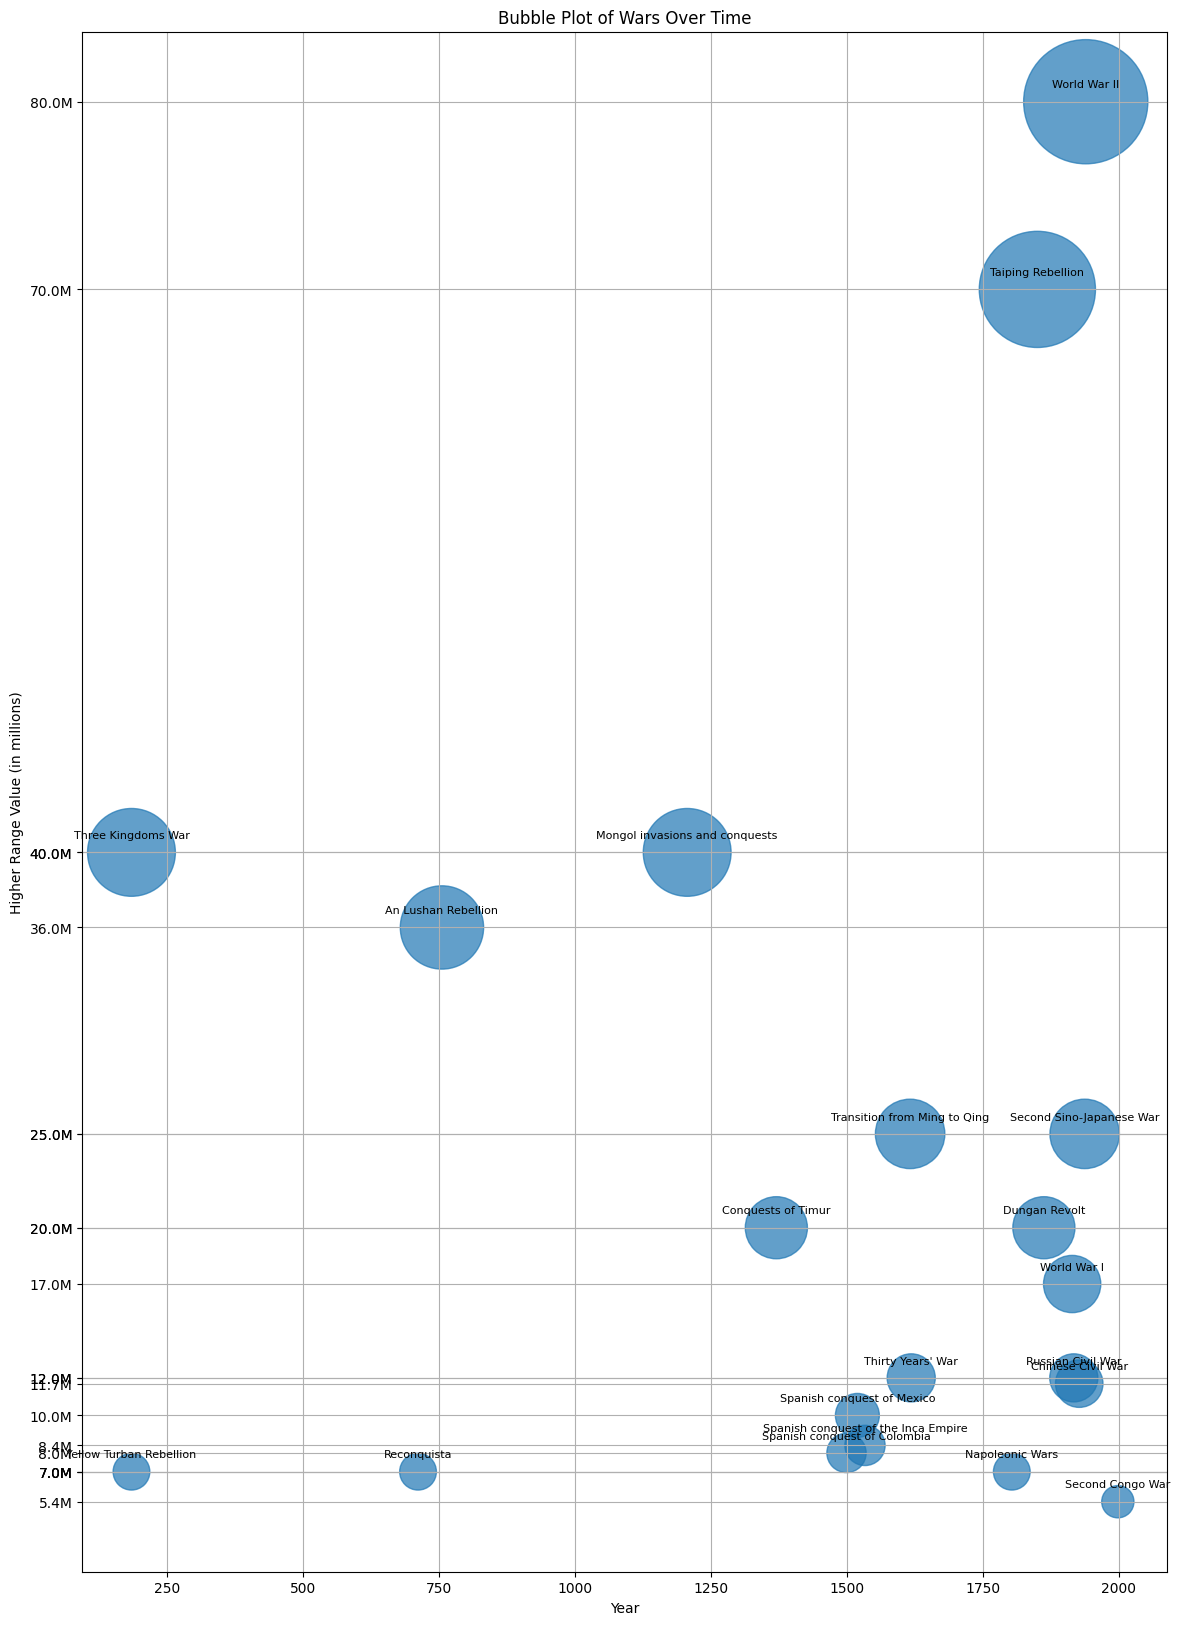

In [54]:
from matplotlib.transforms import offset_copy

import matplotlib.pyplot as plt


# Set the figure size
#plt.figure(figsize=(6, 7))
fig, ax = plt.subplots(figsize=(14, 20))


# Create a copy of the transform with an offset for annotations
offset_transform = offset_copy(ax.transData, fig=ax.figure, x=0, y=10, units='points')



#ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Scatter plot with bubble sizes based on 'higherRange'
ax.scatter(combined_df['cleanDate'], combined_df['sum_higher_rank'], s=[size / 10000 for size in combined_df['higherRange']], alpha=0.7)

# Annotate each point with the respective 'War' label using offset_transform
for x, y, war in zip(combined_df['cleanDate'], combined_df['sum_higher_rank'], combined_df['War']):
    ax.annotate(war, (x, y), textcoords=offset_transform, ha='center', fontsize=8, color='black')



# Custom y-tick positions and labels with doubled spacing for 14.0M, 14.5M, 15.0M, 15.5M
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'#ensure you get decimaql places


# Set the y-axis ticks and apply your custom formatter to the y-axis labels
ytick_positions = combined_df['sum_higher_rank']
ytick_labels = combined_df['higherRange']
ax.set_yticks(ytick_positions)
ax.set_yticklabels([millions_formatter(label, 0) for label in ytick_labels])


# Add labels and title
plt.title('Bubble Plot of Wars Over Time')
plt.xlabel('Year')
plt.ylabel('Higher Range Value (in millions)')

# Show the plot
plt.grid(True)
plt.show()

In [55]:
#ok, some gaps are still too big, we need to do some manual adjustment, especially between 40 and 70M
#25 and 36
#70 and 80, let's make them half the size
# Create a copy of the DataFrame
adjusted_combined_df = combined_df.copy()

# Identify rows where the value in the 'sum_higher_rank' column is 13, 10, or 8
rows_to_replace = adjusted_combined_df['rank'].isin([10, 11])


#tweaking, triel and error
# Replace the identified values with half of their current value in the new DataFrame
adjusted_combined_df.loc[rows_to_replace, 'rank'] /= 4
rows_to_replace = adjusted_combined_df['rank'].isin([30])
adjusted_combined_df.loc[rows_to_replace, 'rank'] /= 6
rows_to_replace = adjusted_combined_df['rank'].isin([4,5])
adjusted_combined_df.loc[rows_to_replace, 'rank'] /= 2


#rerun the cumulative
adjusted_combined_df['sum_higher_rank'] = adjusted_combined_df['higherRange'].copy()
for i in range(1, len(adjusted_combined_df)):
    adjusted_combined_df.loc[i, 'sum_higher_rank'] = adjusted_combined_df.loc[i - 1, 'sum_higher_rank'] + (adjusted_combined_df.loc[i, 'rank'])*100000

adjusted_combined_df

,War,cleanDate,BC,lowerRange,higherRange,rank,sum_higher_rank
0,Second Congo War,1998,False,2500000,5400000,5.400,5400000
1,Yellow Turban Rebellion,184,False,3000000,7000000,1.600,5560000
2,Reconquista,711,False,7000000,7000000,0.000,5560000
3,Napoleonic Wars,1803,False,3500000,7000000,0.000,5560000
4,Spanish conquest of Colombia,1499,False,5000000,8000000,1.000,5660000
5,Spanish conquest of the Inca Empire,1533,False,8400000,8400000,0.400,5700000
6,Spanish conquest of Mexico,1519,False,8000000,10000000,1.600,5860000
7,Chinese Civil War,1927,False,8000000,11692000,1.692,6029200
8,Russian Civil War,1917,False,7000000,12000000,0.308,6060000
9,Thirty Years' War,1618,False,4000000,12000000,0.000,6060000


C:\Users\karol\AppData\Local\Temp\ipykernel_36824\3940733359.py:34: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(war, (x, y), textcoords=offset_transform, ha='center', fontsize=8, color='black')


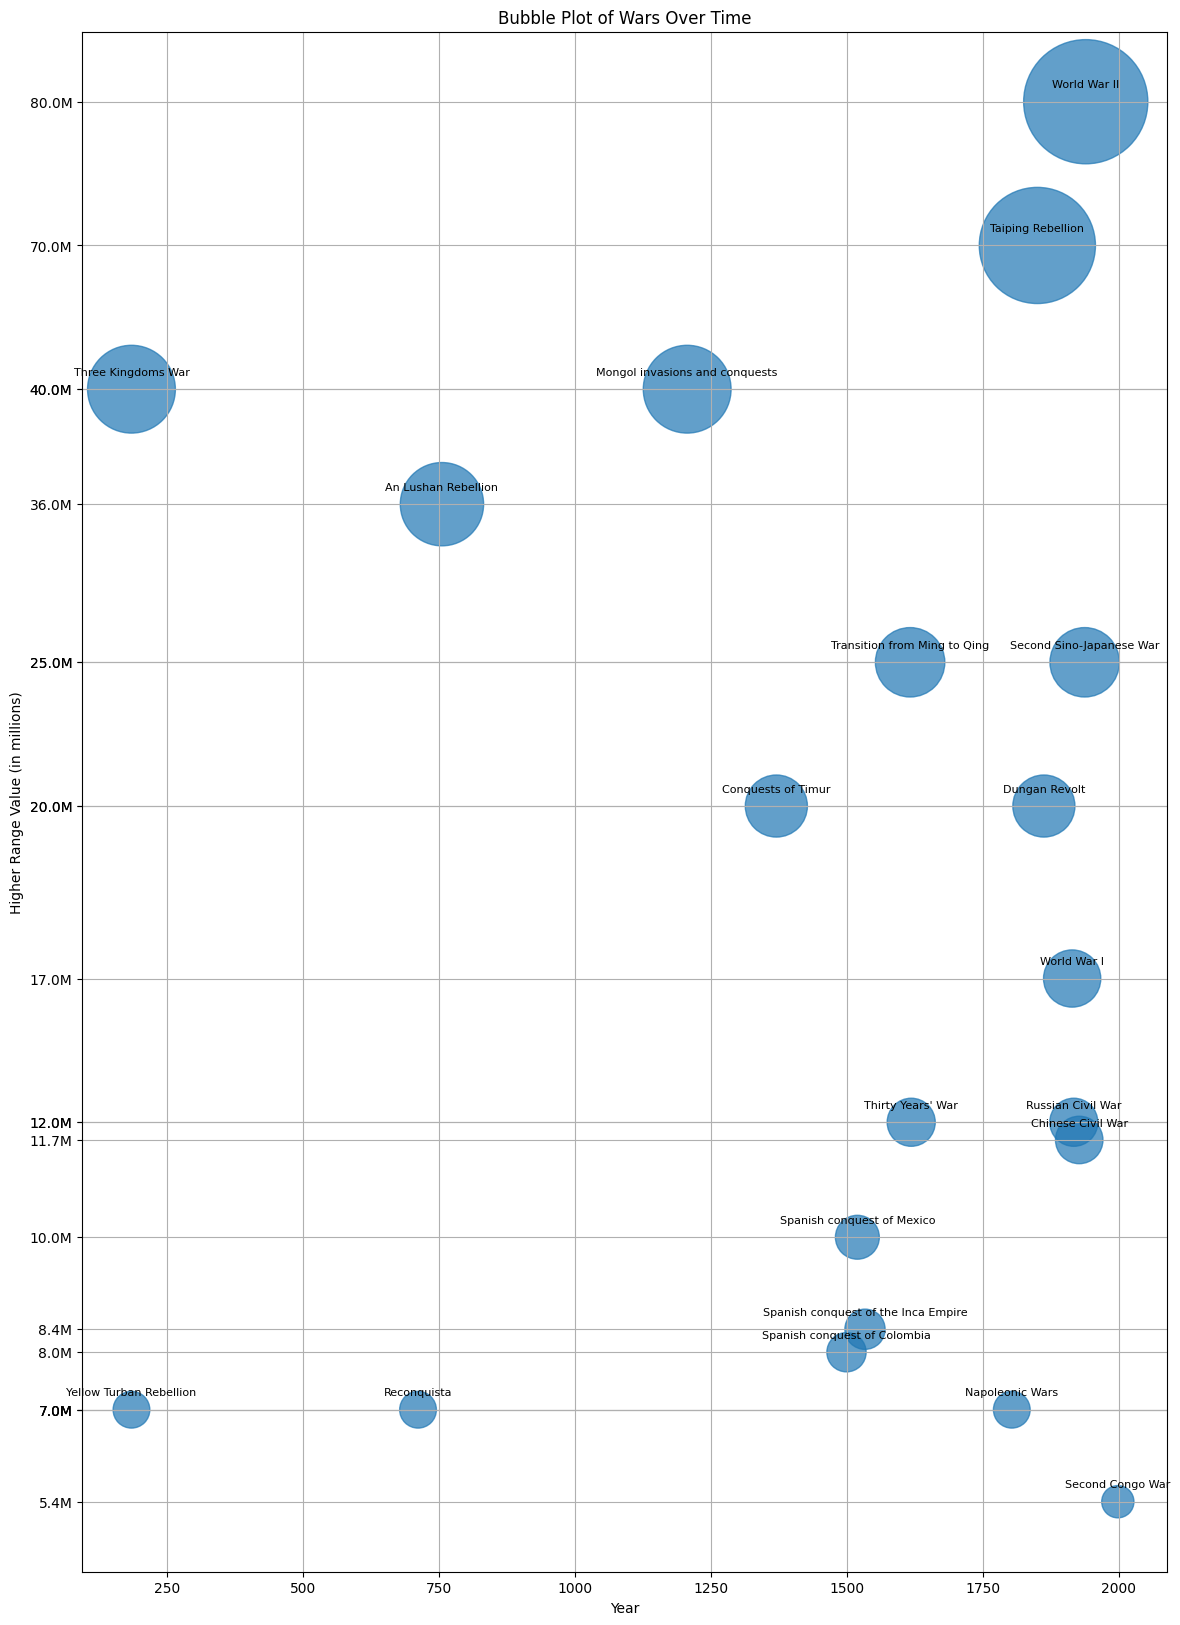

In [56]:
from matplotlib.transforms import offset_copy

import matplotlib.pyplot as plt


# Set the figure size
#plt.figure(figsize=(6, 7))
fig, ax = plt.subplots(figsize=(14, 20))


# Create a copy of the transform with an offset for annotations
offset_transform = offset_copy(ax.transData, fig=ax.figure, x=0, y=10, units='points')



#ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Scatter plot with bubble sizes based on 'higherRange'
ax.scatter(adjusted_combined_df['cleanDate'], adjusted_combined_df['sum_higher_rank'], s=[size / 10000 for size in adjusted_combined_df['higherRange']], alpha=0.7)



# Scatter plot with labels
#plt.scatter(merged_df['cleanDate'], merged_df['sum_higher_rank'], s=100, label=merged_df['War'])

# # Add labels to each point
# for x, y, label in zip(merged_df['cleanDate'], merged_df['sum_higher_rank'], merged_df['War']):
#     plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='black')

    
    
# Annotate each point with the respective 'War' label using offset_transform
for x, y, war in zip(adjusted_combined_df['cleanDate'], adjusted_combined_df['sum_higher_rank'], adjusted_combined_df['War']):
    ax.annotate(war, (x, y), textcoords=offset_transform, ha='center', fontsize=8, color='black')



# Custom y-tick positions and labels with doubled spacing for 14.0M, 14.5M, 15.0M, 15.5M
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'#ensure you get decimaql places


# Set the y-axis ticks and apply your custom formatter to the y-axis labels
ytick_positions = adjusted_combined_df['sum_higher_rank']
ytick_labels = adjusted_combined_df['higherRange']
ax.set_yticks(ytick_positions)
ax.set_yticklabels([millions_formatter(label, 0) for label in ytick_labels])


# Add labels and title
plt.title('Bubble Plot of Wars Over Time')
plt.xlabel('Year')
plt.ylabel('Higher Range Value (in millions)')

# Show the plot
plt.grid(True)
plt.show()